# Aircraft Flight Time Barplot

#### This notebook loops over all synthetic flights and illustrates their length for assumed aircraft performance

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change path to working script directory
current_path=os.getcwd()
print(current_path)
major_path = os.path.abspath("../../../")
major_airborne_data_path=current_path+"/../../GIT_Repository/"
working_path=major_path+"/my_GIT/Synthetic_Airborne_Arctic_ARs/"
src_path=working_path+"/src/"
cfg_path=working_path+"/config/"
print(working_path)
os.chdir(working_path)
sys.path.insert(1, os.path.join(sys.path[0], working_path))
sys.path.insert(2,src_path)
sys.path.insert(3,cfg_path)


C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\Synthetic_AR_Paper\Jupyter_Notebooks
C:\Users\u300737\Desktop\PhD_UHH_WIMI/my_GIT/Synthetic_Airborne_Arctic_ARs/


In [3]:
import flightcampaign as Campaign

import flight_track_creator
import data_config

In [4]:
# Config File
config_file=data_config.load_config_file(major_airborne_data_path,"data_config_file")

analyse_all_flights=True

#
flight_dates={"North_Atlantic_Run":
              {"SRF02":"20180224",
               "SRF04":"20190319",#},
               "SRF07":"20200416",#},
               "SRF08":"20200419"
              },
              "Second_Synthetic_Study":
              {"SRF02":"20110317",
               "SRF03":"20110423",
               "SRF08":"20150314",
               "SRF09":"20160311",
               "SRF12":"20180225"
               }}
flight_tracks_dict={}
campaigns=[*flight_dates.keys()]
shifted_lat=0
shifted_lon=0
ar_of_day="AR_internal"


C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\Synthetic_AR_Paper\Jupyter_Notebooks/../../GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\Synthetic_AR_Paper\Jupyter_Notebooks/../../GIT_Repository//data_config_file.ini.ini  already exists


In [5]:
campaign=campaigns[0]
flight=[*flight_dates[campaign]][0]

In [6]:
for campaign in campaigns:
    for flight in flight_dates[campaign]:
        if campaign=="North_Atlantic_Run":
            print("Analyse given flight: ",flight)
            cmpgn_cls=Campaign.North_Atlantic_February_Run(
                    interested_flights=[flight],
                        is_flight_campaign=True,
                        major_path=config_file["Data_Paths"]["campaign_path"],
                        aircraft="HALO",instruments=[])
        
            cmpgn_cls.specify_flights_of_interest(flight)
            cmpgn_cls.create_directory(directory_types=["data"])
        elif campaign=="Second_Synthetic_Study":
            cmpgn_cls=Campaign.Second_Synthetic_Study(
                    interested_flights=[flight],
                        is_flight_campaign=True,
                        major_path=config_file["Data_Paths"]["campaign_path"],
                        aircraft="HALO",instruments=[])
        
            cmpgn_cls.specify_flights_of_interest(flight)
            cmpgn_cls.create_directory(directory_types=["data"])
    
        if not shifted_lat==0:
            ar_of_day=ar_of_day+"_"+str(shifted_lat)
            track_type="shifted"
        else:
            track_type="internal"
        Tracker=flight_track_creator.Flighttracker(cmpgn_cls,flight,ar_of_day,
                          shifted_lat=shifted_lat,
                          shifted_lon=shifted_lon,
                          track_type=track_type)
        aircraft_df,campaign_path=Tracker.load_existing_flight_track()
        flight_tracks_dict[flight_dates[campaign][flight]]=aircraft_df


Analyse given flight:  SRF02
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
Entries:  dict_keys(['data']) have added to or changed in the config file
Analyse given flight:  SRF04
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
Entries:  dict_keys(['data']) have added to or changed in the config file
Analyse given flight:  SRF07
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
Entries:  dict_keys(['data']) have added to or changed in the config file
Analyse given flight:  SRF08
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
Entries:  dict_keys(['data']) have added to or changed in the config file
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study/
Entrie

In [7]:
track_lengths=pd.DataFrame(data=np.nan,index=[*flight_tracks_dict.keys()],columns=["Inflow","Internal","Outflow"])
for flight in flight_tracks_dict.keys():
    loop_aircraft_df=flight_tracks_dict[flight]
    track_length=[loop_aircraft_df[loop_aircraft_df["leg_type"]=="inflow"].shape[0]/60,
              loop_aircraft_df[loop_aircraft_df["leg_type"]=="internal"].shape[0]/60,
              loop_aircraft_df[loop_aircraft_df["leg_type"]=="outflow"].shape[0]/60]
    track_lengths.loc[flight]=track_length

In [8]:
track_lengths=track_lengths.sort_index()

In [9]:
track_lengths

,Inflow,Internal,Outflow
20110317,60.016667,66.933333,60.016667
20110423,52.016667,51.133333,47.016667
20150314,55.016667,54.783333,45.016667
20160311,45.016667,52.400000,39.016667
20180224,50.016667,57.550000,50.016667
20180225,39.016667,45.583333,39.016667
20190319,50.016667,48.383333,50.016667
20200416,45.016667,48.616667,45.016667
20200419,52.016667,51.650000,52.016667


Figure saved as: C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\Synthetic_AR_Paper\Jupyter_Notebooks/..//Manuscript/Paper_Plots/Fig04_Aircraft_Flight_Time.pdf


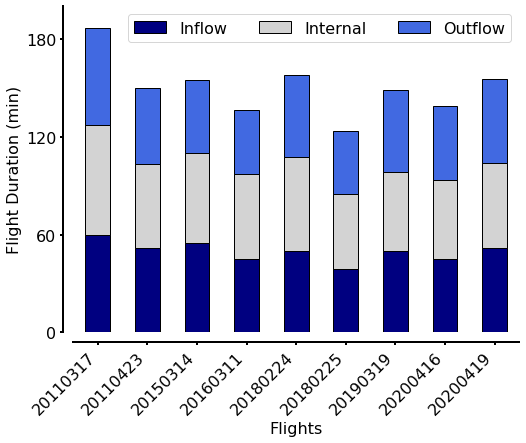

In [11]:
matplotlib.rcParams.update({"font.size":16})
overall_paper_path=current_path+"/../"
bar_fig=plt.figure(figsize=(8,6))
ax1=bar_fig.add_subplot(111)
# create stacked bar chart for students DataFrame
track_lengths.plot(ax=ax1,kind='bar', stacked=True, color=['navy','lightgrey','royalblue'],edgecolor="k")
 
# Add Title and Labels
#plt.title('Intermediate Students Pass %')
plt.xlabel('Flights')
plt.ylabel('Flight Duration (min)')
sns.despine(offset=10)
plt.ylim([0,200])
plt.yticks([0,60,120,180])
plt.xticks(rotation=45, ha='right')
ax1.xaxis.set_tick_params(width=2,length=3)
ax1.yaxis.set_tick_params(width=2,length=3)
ax1.legend(ncol=3)
plt.setp(ax1.spines.values(), linewidth=2)
plot_path=overall_paper_path+"/Manuscript/Paper_Plots/"
fig_name="Fig04_Aircraft_Flight_Time.pdf"
bar_fig.savefig(plot_path+fig_name,dpi=100,bbox_inches="tight")
print("Figure saved as:",plot_path+fig_name)